(12407, 100)


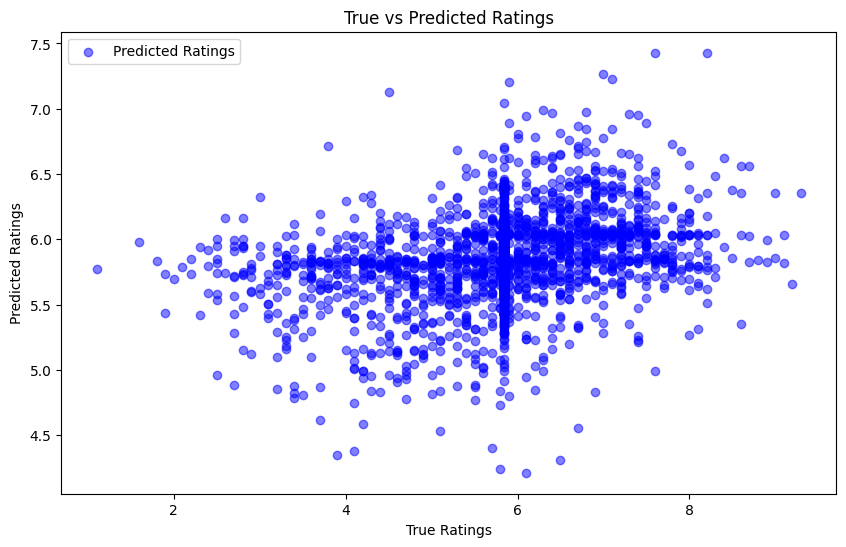

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('movies.csv', encoding='ISO-8859-1')
features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
target = df['Rating']
target.fillna(target.mean(), inplace=True)

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features)
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(features.columns))
data = pd.concat([encoded_features_df, target], axis=1)
X = data.drop(columns='Rating')
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# print(X_train_pca.shape)

model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Ratings')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='45-degree line')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True vs Predicted Ratings')
plt.legend()
plt.show()


